In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
station_name = "锡东水厂"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241124_插值填充_{station_name}.csv')

# 将日期列转换为datetime格式
df['date'] = pd.to_datetime(df['date'])

# 获取日期范围
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# 创建完整的日期DataFrame
complete_df = pd.DataFrame({'date': date_range})

# 与原始数据合并，保留所有日期
df_filled = pd.merge(complete_df, df, on='date', how='left')

# 将缺失值填充为NaN
df_filled = df_filled.fillna(np.nan)

# 读取站点数据
station_df = pd.read_csv(f'001-{station_name}.csv')
station_df['date'] = pd.to_datetime(station_df['date'])

# 将两个数据集按日期合并
merged_df = pd.merge(df_filled, station_df, on='date', how='left')

# 保存合并后的结果
merged_df.to_csv(f'004-MCD18C2-station-merged_{station_name}.csv', index=False)

print("已完成数据合并，包含遥感特征和站点数据")


已完成数据合并，包含遥感特征和站点数据



藻密度与其他变量的相关性分析:
density         1.000000
chla            0.585425
permanganate    0.232584
turbidity       0.229760
temperature     0.204312
pH              0.129167
GMT_0900_PAR    0.101385
GMT_0000_PAR    0.099897
TP              0.098658
DAPAR           0.091966
GMT_0300_PAR    0.080270
GMT_0600_PAR    0.080046
PDVI            0.076817
NH              0.066893
MPAR            0.056993
PPDI            0.040116
APAR            0.029947
GMT_2100_PAR    0.029947
PAI             0.026913
TN             -0.046458
conductivity   -0.149752
oxygen         -0.150031
Name: density, dtype: float64


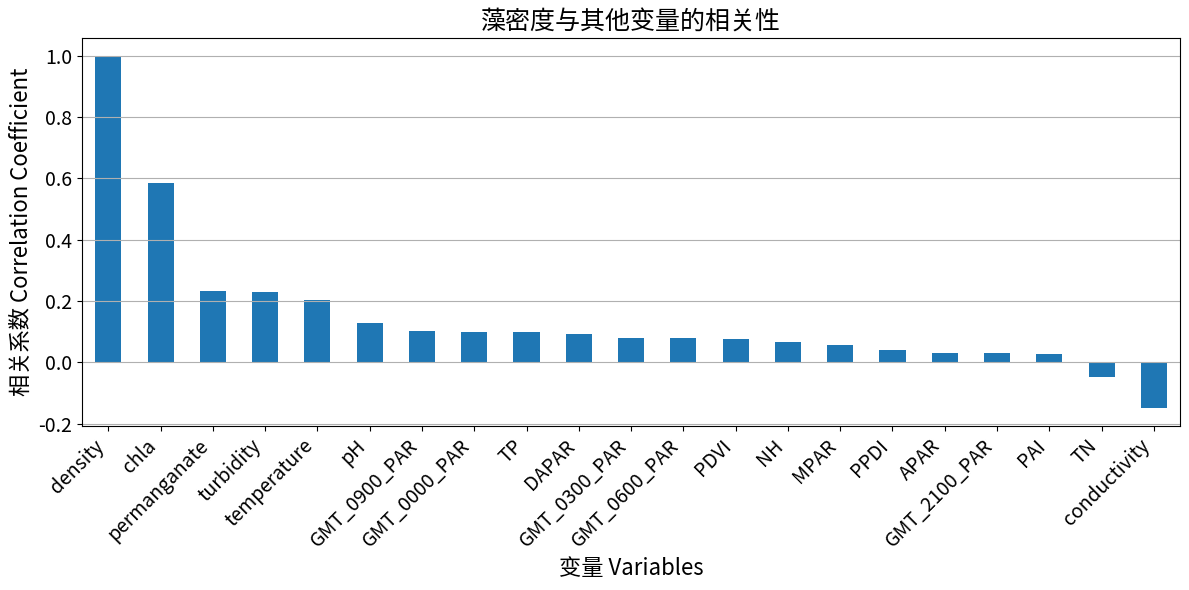


PAR变量与藻密度的相关性分析:
density         1.000000
GMT_0900_PAR    0.101385
GMT_0000_PAR    0.099897
GMT_0300_PAR    0.080270
GMT_0600_PAR    0.080046
GMT_2100_PAR    0.029947
Name: density, dtype: float64

光合指数与藻密度的相关性分析:
density    1.000000
DAPAR      0.091966
PDVI       0.076817
MPAR       0.056993
PPDI       0.040116
APAR       0.029947
PAI        0.026913
Name: density, dtype: float64


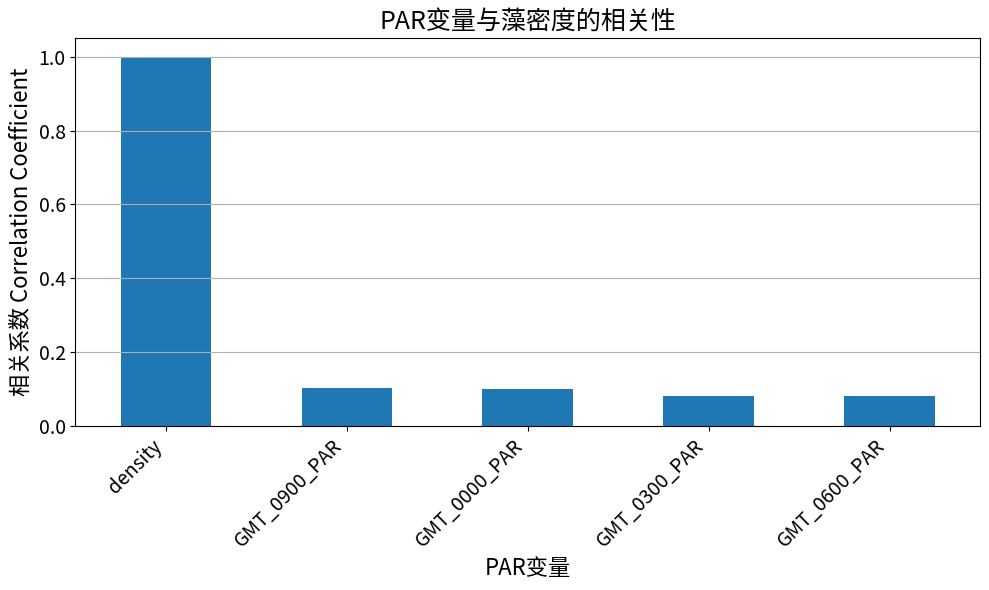

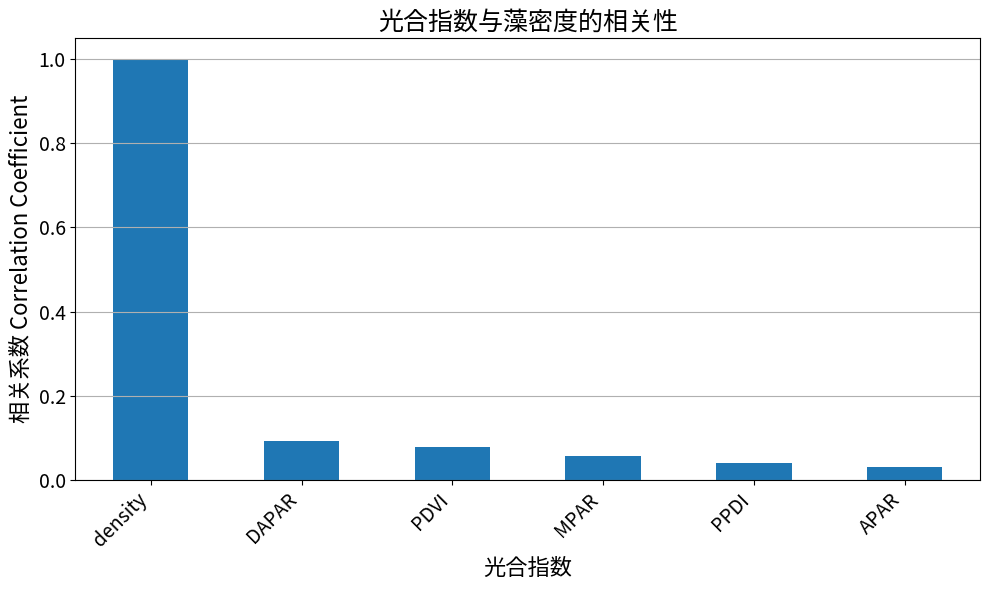

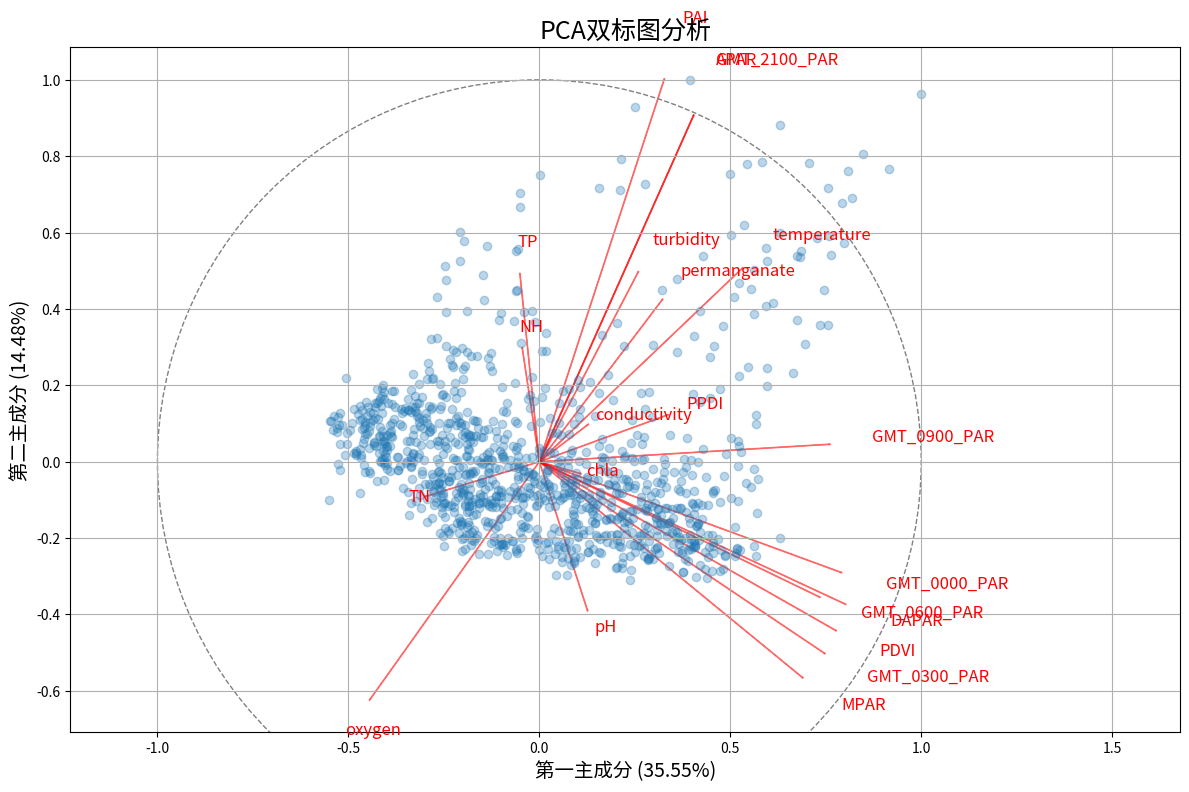

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 读取数据
# merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 计算藻密度与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
                   'GMT_0900_PAR', 'GMT_2100_PAR',
                   'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
correlations = merged_df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n藻密度与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('藻密度与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# # 选择相关性最强的4个变量,并确保density只出现一次
# top_corr_vars = correlations.index[:4].tolist()
# if 'density' in top_corr_vars:
#     top_corr_vars.remove('density')
# vars_to_plot = top_corr_vars + ['density']

# # 检查数据是否为空
# plot_data = merged_df[vars_to_plot].dropna()
# if not plot_data.empty:
#     plt.figure(figsize=(12, 12))
#     sns.pairplot(plot_data, diag_kind='kde')
#     plt.suptitle('藻密度与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
#     plt.show()
# else:
#     print("数据为空,无法绘制散点图矩阵")

# 计算PAR相关变量与藻密度的相关性
par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
par_correlations = merged_df[par_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 计算其他光合指数与藻密度的相关性
photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
photo_correlations = merged_df[photo_vars + ['density']].corr()['density'].sort_values(ascending=False)

print("\nPAR变量与藻密度的相关性分析:")
print(par_correlations)

print("\n光合指数与藻密度的相关性分析:")
print(photo_correlations)

# 可视化PAR相关性
plt.figure(figsize=(10, 6))
par_correlations[:-1].plot(kind='bar')
plt.title('PAR变量与藻密度的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('PAR变量', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 可视化光合指数相关性
plt.figure(figsize=(10, 6))
photo_correlations[:-1].plot(kind='bar')
plt.title('光合指数与藻密度的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('光合指数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 进行PCA分析
# 选择要进行PCA分析的变量
pca_vars = correlation_vars  # 使用之前定义的所有变量

# 准备数据
X = merged_df[pca_vars].dropna()
X_scaled = StandardScaler().fit_transform(X)

# 执行PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# 计算解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制PCA双标图
plt.figure(figsize=(12, 8))
scale = np.max(np.abs(pca.components_[:2]))

# 绘制变量向量
for i, var in enumerate(pca_vars):
    plt.arrow(0, 0,
              pca.components_[0, i] / scale,
              pca.components_[1, i] / scale,
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i] / scale * 1.15,
             pca.components_[1, i] / scale * 1.15,
             var, color='r', fontsize=12)

# 绘制样本点
plt.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
            pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
            alpha=0.3)

# 添加标题和轴标签
plt.title('PCA双标图分析', fontproperties=chinese_font, fontsize=18)
plt.xlabel(f'第一主成分 ({explained_variance_ratio[0]:.2%})', fontproperties=chinese_font, fontsize=14)
plt.ylabel(f'第二主成分 ({explained_variance_ratio[1]:.2%})', fontproperties=chinese_font, fontsize=14)

# 添加单位圆
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


叶绿素与其他变量的相关性分析:
chla            1.000000
TP              0.204539
pH              0.203858
density         0.176347
permanganate    0.160890
temperature     0.160652
PPDI            0.050160
GMT_0600_PAR    0.032166
DAPAR           0.030231
GMT_0000_PAR    0.028642
GMT_0300_PAR    0.026382
GMT_0900_PAR    0.024341
turbidity       0.020972
PDVI            0.018850
MPAR            0.012061
APAR           -0.026226
GMT_2100_PAR   -0.026226
PAI            -0.033017
NH             -0.034774
conductivity   -0.046306
TN             -0.051686
oxygen         -0.121751
Name: chla, dtype: float64


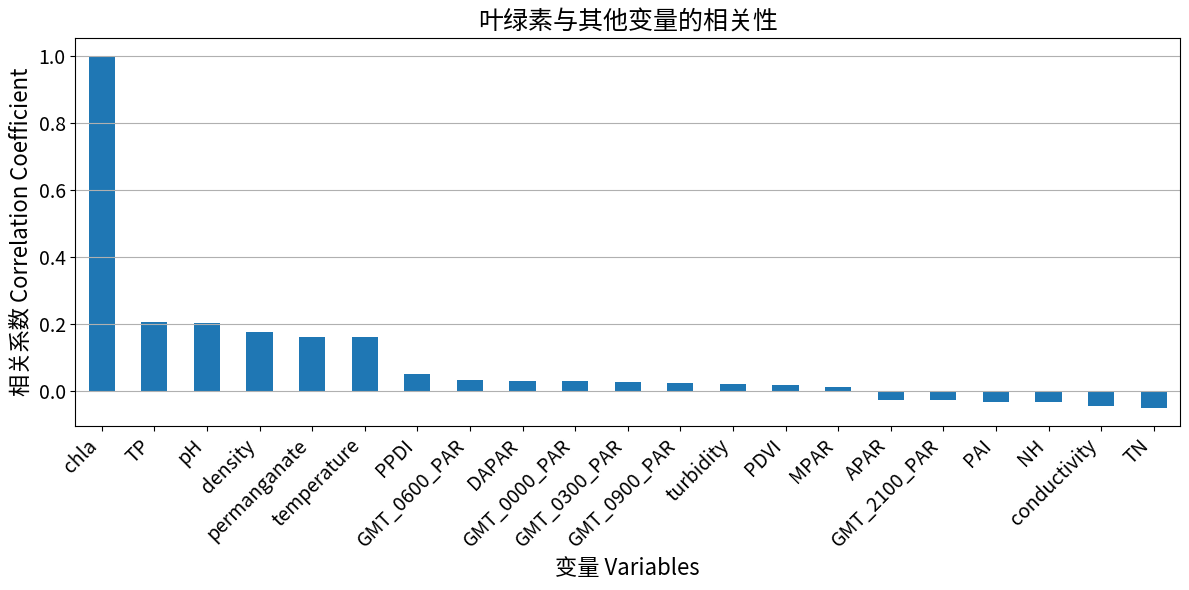


PAR相关变量与叶绿素的相关性分析:
chla            1.000000
GMT_0600_PAR    0.032166
GMT_0000_PAR    0.028642
GMT_0300_PAR    0.026382
GMT_0900_PAR    0.024341
GMT_2100_PAR   -0.026226
Name: chla, dtype: float64

光合指数与叶绿素的相关性分析:
chla     1.000000
PPDI     0.050160
DAPAR    0.030231
PDVI     0.018850
MPAR     0.012061
APAR    -0.026226
PAI     -0.033017
Name: chla, dtype: float64


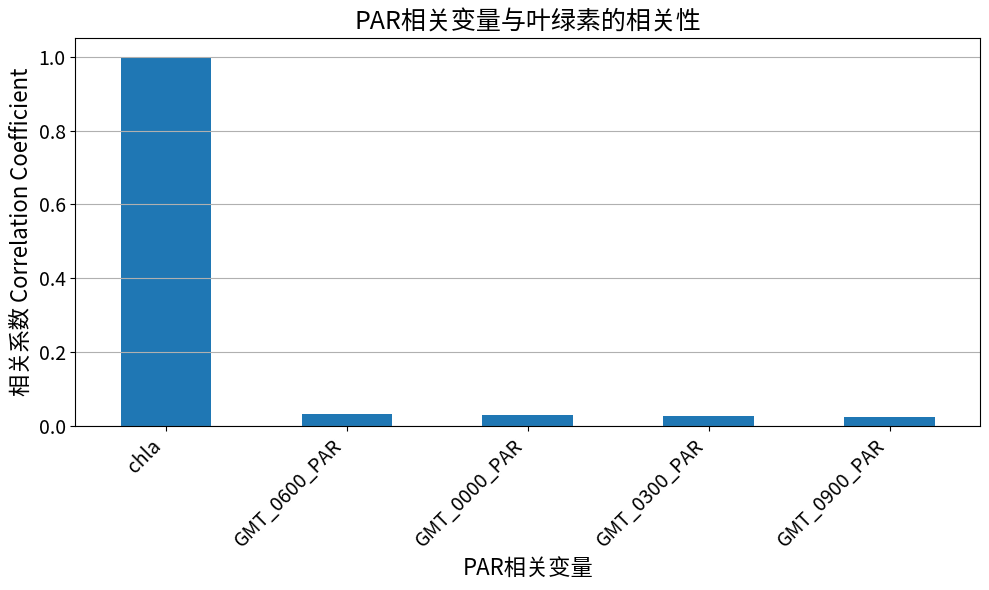

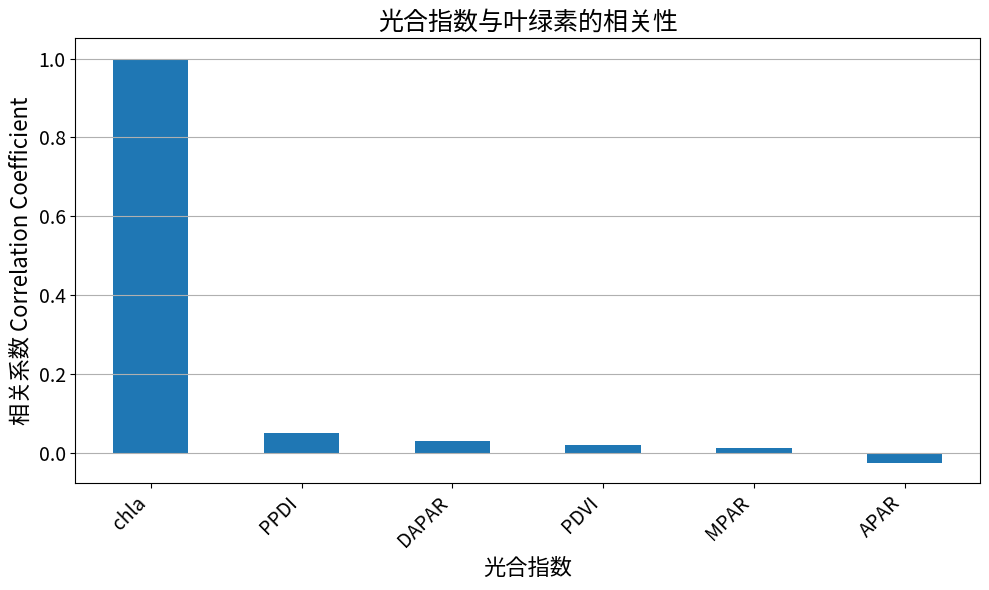

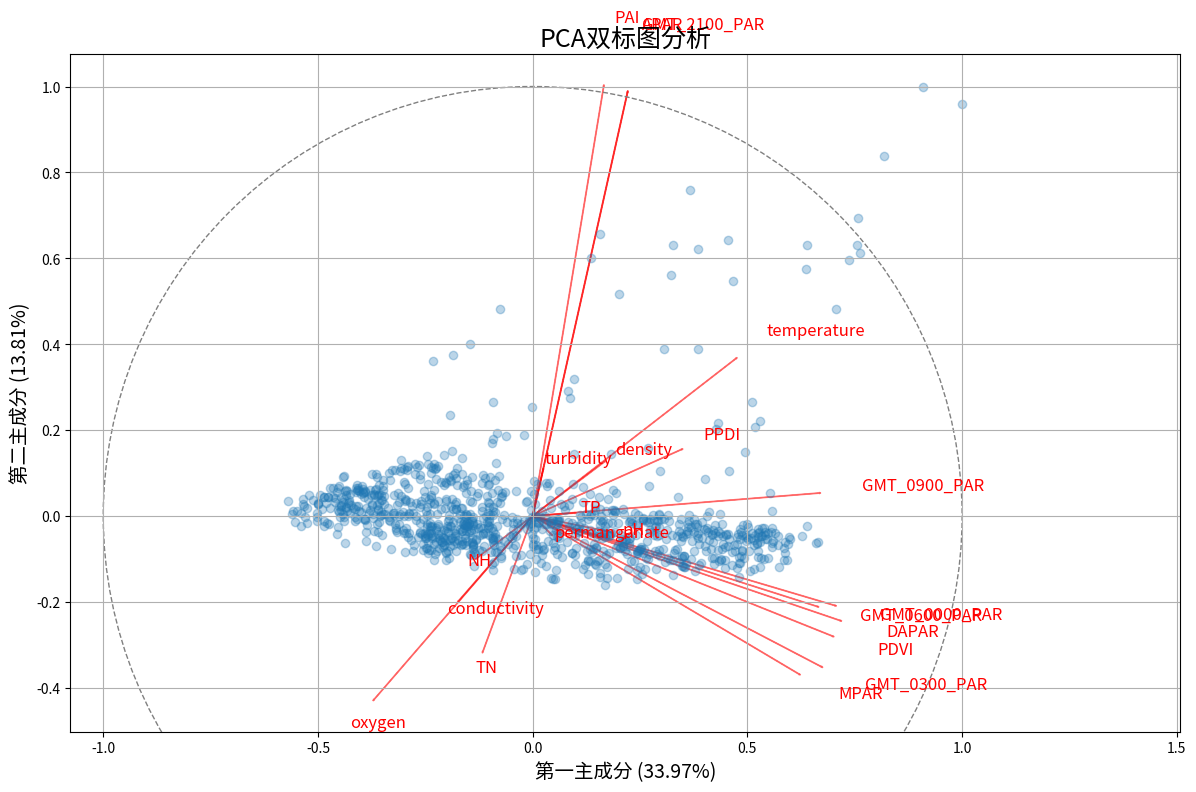

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 读取数据
merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 计算叶绿素与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
                   'GMT_0900_PAR', 'GMT_2100_PAR',
                   'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
correlations = merged_df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# # 选择相关性最强的4个变量,并确保chla只出现一次
# top_corr_vars = correlations.index[:4].tolist()
# if 'chla' in top_corr_vars:
#     top_corr_vars.remove('chla')
# vars_to_plot = top_corr_vars + ['chla']

# # 检查数据是否为空
# plot_data = merged_df[vars_to_plot].dropna()
# if not plot_data.empty:
#     plt.figure(figsize=(12, 12))
#     sns.pairplot(plot_data, diag_kind='kde')
#     plt.suptitle('叶绿素与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
#     plt.show()
# else:
#     print("数据为空,无法绘制散点图矩阵")

# 计算PAR相关变量与叶绿素的相关性
par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
par_correlations = merged_df[par_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 计算其他光合指数与叶绿素的相关性
photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
photo_correlations = merged_df[photo_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

print("\nPAR相关变量与叶绿素的相关性分析:")
print(par_correlations)

print("\n光合指数与叶绿素的相关性分析:")
print(photo_correlations)

# 可视化PAR相关变量相关性
plt.figure(figsize=(10, 6))
par_correlations[:-1].plot(kind='bar')
plt.title('PAR相关变量与叶绿素的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('PAR相关变量', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 可视化光合指数相关性
plt.figure(figsize=(10, 6))
photo_correlations[:-1].plot(kind='bar')
plt.title('光合指数与叶绿素的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('光合指数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 进行PCA分析
# 选择要进行PCA分析的变量
pca_vars = correlation_vars  # 使用之前定义的所有变量

# 准备数据
X = merged_df[pca_vars].dropna()
X_scaled = StandardScaler().fit_transform(X)

# 执行PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# 计算解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制PCA双标图
plt.figure(figsize=(12, 8))
scale = np.max(np.abs(pca.components_[:2]))

# 绘制变量向量
for i, var in enumerate(pca_vars):
    plt.arrow(0, 0,
              pca.components_[0, i] / scale,
              pca.components_[1, i] / scale,
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i] / scale * 1.15,
             pca.components_[1, i] / scale * 1.15,
             var, color='r', fontsize=12)

# 绘制样本点
plt.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
            pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
            alpha=0.3)

# 添加标题和轴标签
plt.title('PCA双标图分析', fontproperties=chinese_font, fontsize=18)
plt.xlabel(f'第一主成分 ({explained_variance_ratio[0]:.2%})', fontproperties=chinese_font, fontsize=14)
plt.ylabel(f'第二主成分 ({explained_variance_ratio[1]:.2%})', fontproperties=chinese_font, fontsize=14)

# 添加单位圆
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

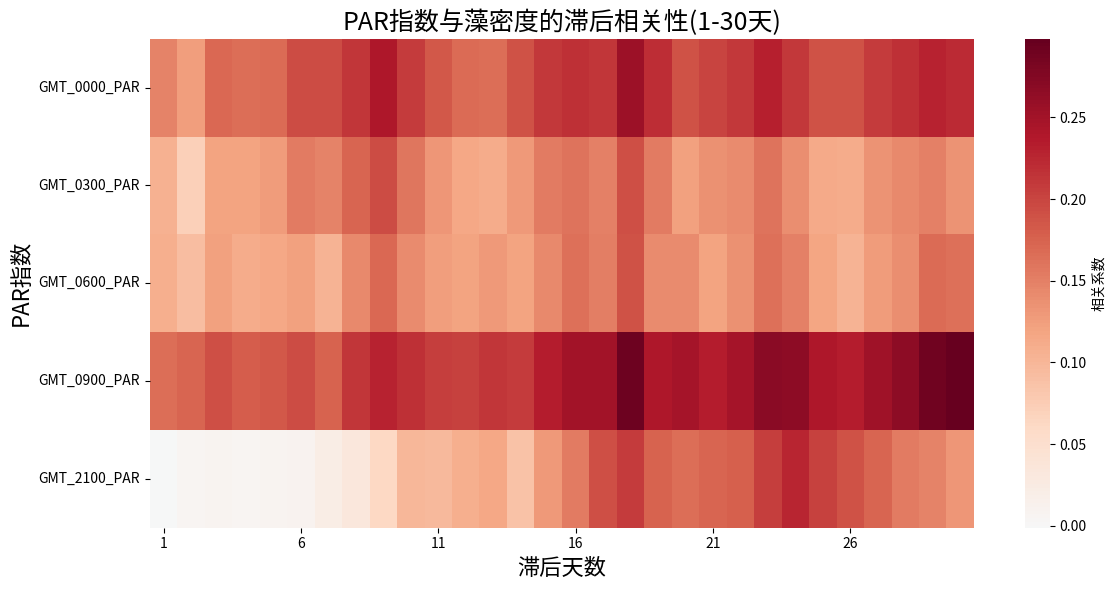

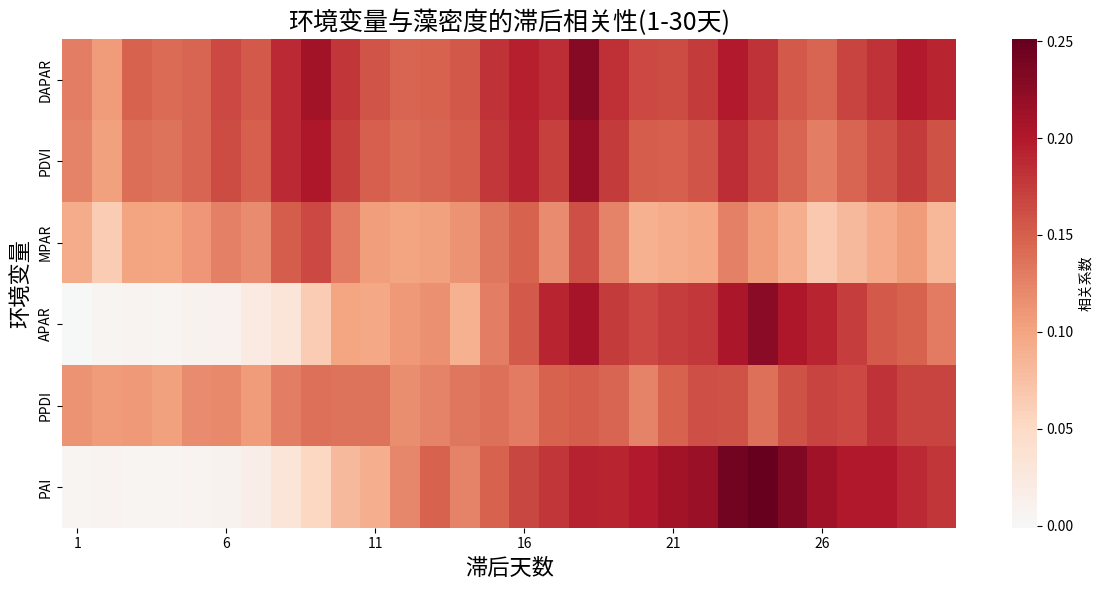


PAR指数的最大滞后相关性及对应滞后天数:
GMT_0000_PAR: 相关系数 = 0.255, 滞后天数 = 18
GMT_0300_PAR: 相关系数 = 0.195, 滞后天数 = 9
GMT_0600_PAR: 相关系数 = 0.190, 滞后天数 = 18
GMT_0900_PAR: 相关系数 = 0.298, 滞后天数 = 30
GMT_2100_PAR: 相关系数 = 0.226, 滞后天数 = 24

环境变量的最大滞后相关性及对应滞后天数:
DAPAR: 相关系数 = 0.228, 滞后天数 = 18
PDVI: 相关系数 = 0.218, 滞后天数 = 18
MPAR: 相关系数 = 0.166, 滞后天数 = 9
APAR: 相关系数 = 0.226, 滞后天数 = 24
PPDI: 相关系数 = 0.181, 滞后天数 = 28
PAI: 相关系数 = 0.251, 滞后天数 = 24


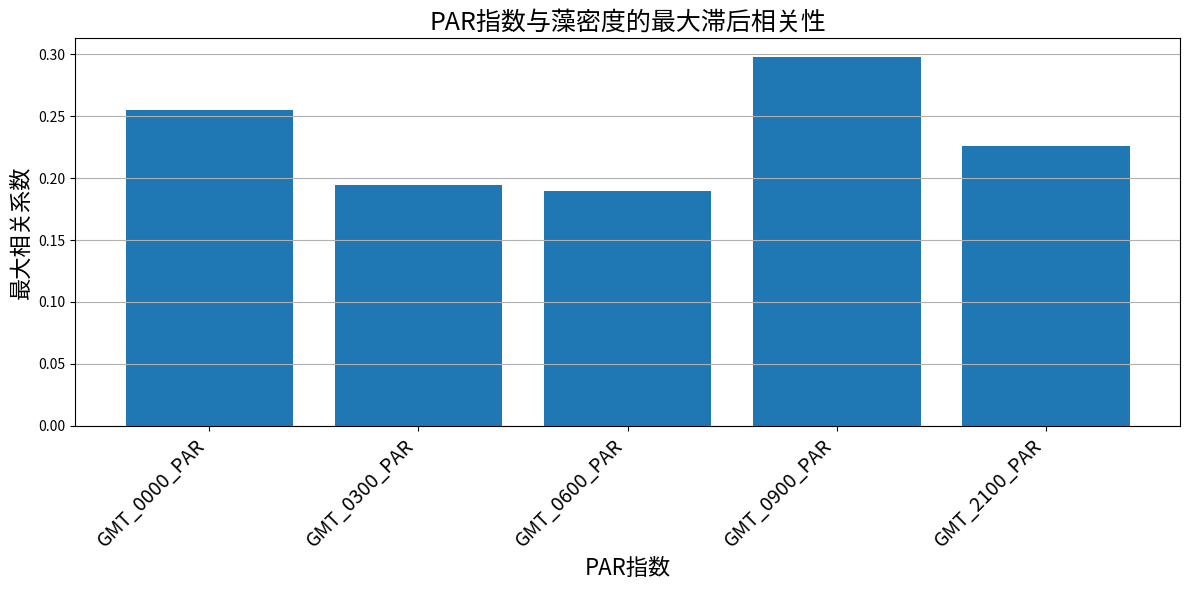

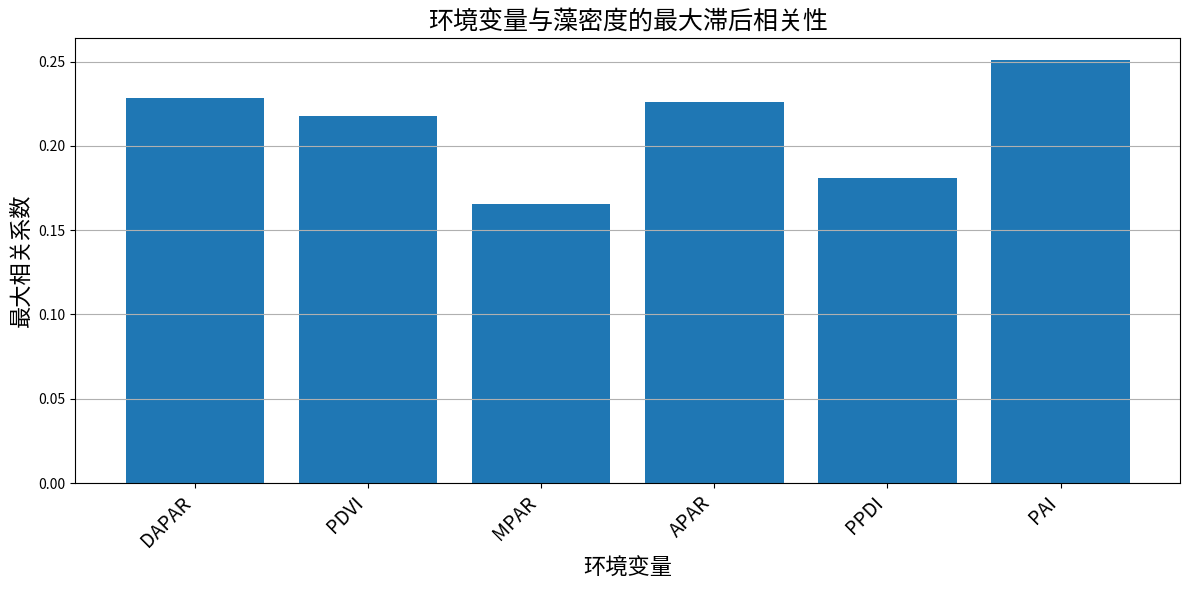

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 读取数据
merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 定义遥感指数和波段变量
rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

# 遥感指数的滞后相关性分析
rs_lag_correlations = {}
for var in rs_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])  # 改为density
        lag_corrs.append(lagged_corr)
    rs_lag_correlations[var] = lag_corrs

# 环境变量的滞后相关性分析
env_lag_correlations = {}
for var in env_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])  # 改为density
        lag_corrs.append(lagged_corr)
    env_lag_correlations[var] = lag_corrs

# 绘制遥感指数滞后相关性热力图
plt.figure(figsize=(12, 6))
rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('PAR指数与藻密度的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)  # 改为藻密度
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('PAR指数', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 绘制环境变量滞后相关性热力图
plt.figure(figsize=(12, 6))
env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('环境变量与藻密度的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)  # 改为藻密度
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('环境变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出遥感指数的最大滞后相关性
rs_max_lag_correlations = {}
for var in rs_vars:
    max_corr = max(rs_lag_correlations[var], key=abs)
    max_lag = rs_lag_correlations[var].index(max_corr) + 1
    rs_max_lag_correlations[var] = (max_corr, max_lag)

# 找出环境变量的最大滞后相关性
env_max_lag_correlations = {}
for var in env_vars:
    max_corr = max(env_lag_correlations[var], key=abs)
    max_lag = env_lag_correlations[var].index(max_corr) + 1
    env_max_lag_correlations[var] = (max_corr, max_lag)

print("\nPAR指数的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in rs_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

print("\n环境变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in env_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制遥感指数最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
rs_max_corrs = [corr for corr, _ in rs_max_lag_correlations.values()]
plt.bar(rs_max_lag_correlations.keys(), rs_max_corrs)
plt.title('PAR指数与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)  # 改为藻密度
plt.xlabel('PAR指数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制环境变量最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
env_max_corrs = [corr for corr, _ in env_max_lag_correlations.values()]
plt.bar(env_max_lag_correlations.keys(), env_max_corrs)
plt.title('环境变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)  # 改为藻密度
plt.xlabel('环境变量', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

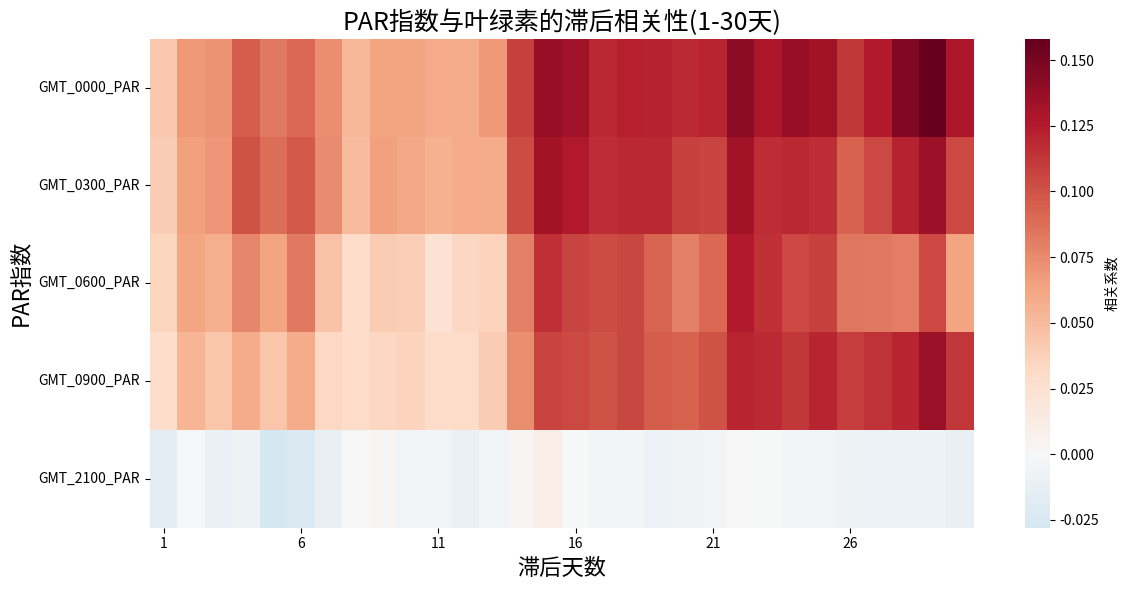

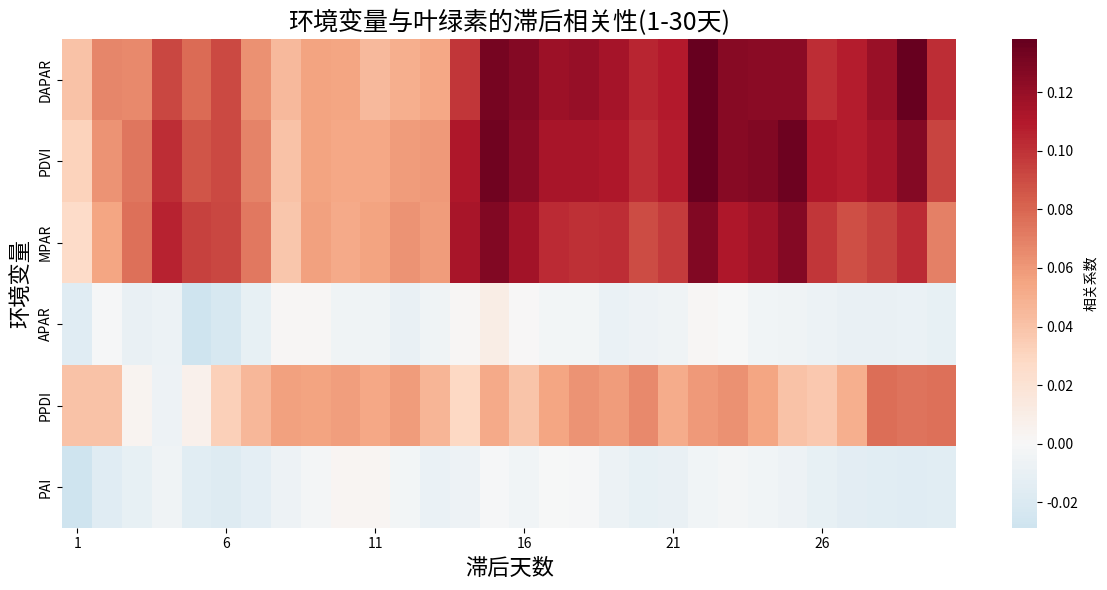


PAR指数的最大滞后相关性及对应滞后天数:
GMT_0000_PAR: 相关系数 = 0.158, 滞后天数 = 29
GMT_0300_PAR: 相关系数 = 0.135, 滞后天数 = 29
GMT_0600_PAR: 相关系数 = 0.125, 滞后天数 = 22
GMT_0900_PAR: 相关系数 = 0.136, 滞后天数 = 29
GMT_2100_PAR: 相关系数 = -0.028, 滞后天数 = 5

环境变量的最大滞后相关性及对应滞后天数:
DAPAR: 相关系数 = 0.138, 滞后天数 = 22
PDVI: 相关系数 = 0.138, 滞后天数 = 22
MPAR: 相关系数 = 0.127, 滞后天数 = 15
APAR: 相关系数 = -0.028, 滞后天数 = 5
PPDI: 相关系数 = 0.077, 滞后天数 = 28
PAI: 相关系数 = -0.029, 滞后天数 = 1


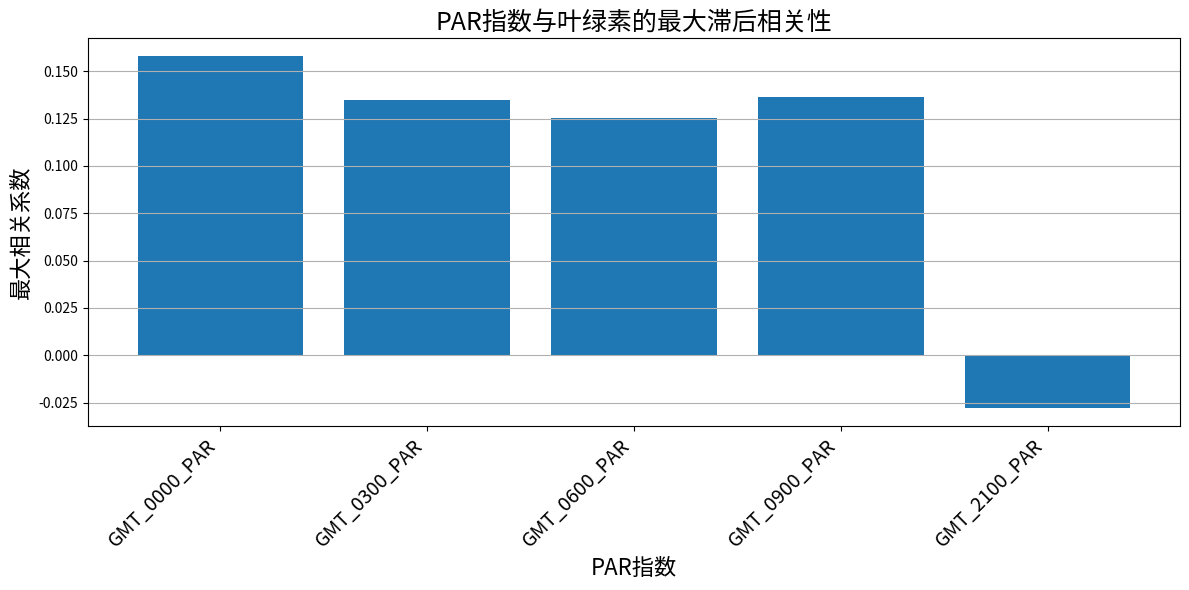

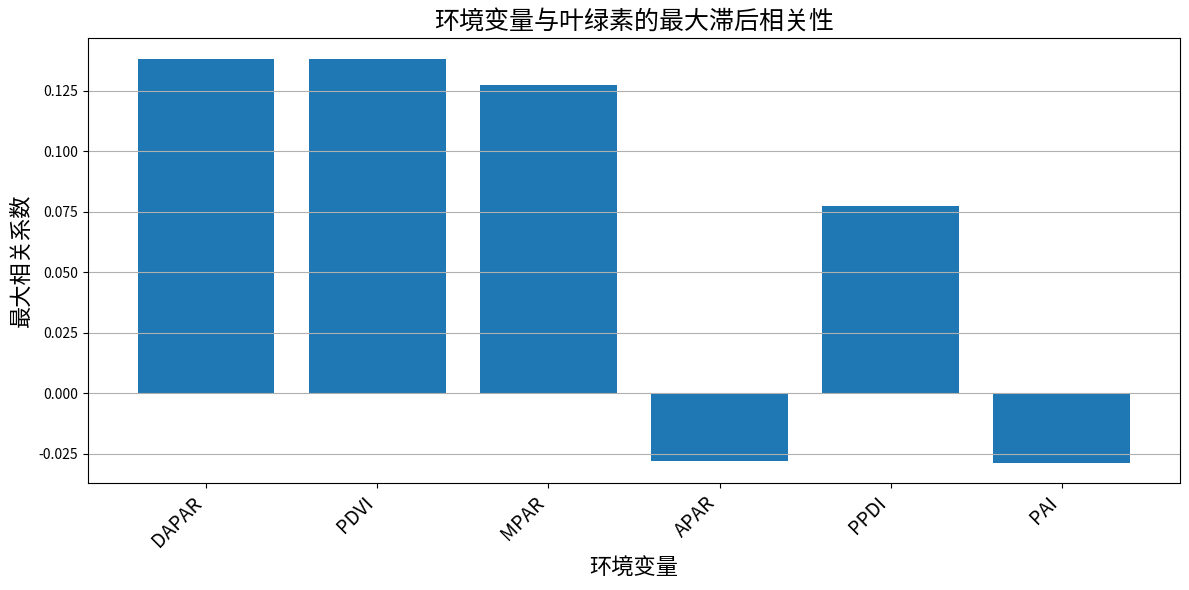

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 读取数据
merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 定义遥感指数和波段变量
rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

# 遥感指数的滞后相关性分析
rs_lag_correlations = {}
for var in rs_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
        lag_corrs.append(lagged_corr)
    rs_lag_correlations[var] = lag_corrs

# 环境变量的滞后相关性分析
env_lag_correlations = {}
for var in env_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
        lag_corrs.append(lagged_corr)
    env_lag_correlations[var] = lag_corrs

# 绘制遥感指数滞后相关性热力图
plt.figure(figsize=(12, 6))
rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('PAR指数与叶绿素的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('PAR指数', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 绘制环境变量滞后相关性热力图
plt.figure(figsize=(12, 6))
env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('环境变量与叶绿素的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('环境变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出遥感指数的最大滞后相关性
rs_max_lag_correlations = {}
for var in rs_vars:
    max_corr = max(rs_lag_correlations[var], key=abs)
    max_lag = rs_lag_correlations[var].index(max_corr) + 1
    rs_max_lag_correlations[var] = (max_corr, max_lag)

# 找出环境变量的最大滞后相关性
env_max_lag_correlations = {}
for var in env_vars:
    max_corr = max(env_lag_correlations[var], key=abs)
    max_lag = env_lag_correlations[var].index(max_corr) + 1
    env_max_lag_correlations[var] = (max_corr, max_lag)

print("\nPAR指数的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in rs_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

print("\n环境变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in env_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制遥感指数最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
rs_max_corrs = [corr for corr, _ in rs_max_lag_correlations.values()]
plt.bar(rs_max_lag_correlations.keys(), rs_max_corrs)
plt.title('PAR指数与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('PAR指数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制环境变量最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
env_max_corrs = [corr for corr, _ in env_max_lag_correlations.values()]
plt.bar(env_max_lag_correlations.keys(), env_max_corrs)
plt.title('环境变量与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('环境变量', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()